In [1]:
import seaborn as sns
import pandas as pd

# Load Titanic dataset
df = sns.load_dataset("titanic")

# Display first few rows
df.head()


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [2]:
# Check for missing values
df.isnull().sum()


survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [5]:
# Check available columns
print(df.columns)

# Drop only the columns that exist
cols_to_drop = ["deck", "embark_town", "alive"]
df = df.drop(columns=[col for col in cols_to_drop if col in df.columns])

# Fill missing age with median
df["age"] = df["age"].fillna(df["age"].median())

# Drop any remaining rows with missing values
df.dropna(inplace=True)

# Confirm it's clean
print(df.isnull().sum())


Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'alone'],
      dtype='object')
survived      0
pclass        0
sex           0
age           0
sibsp         0
parch         0
fare          0
embarked      0
class         0
who           0
adult_male    0
alone         0
dtype: int64


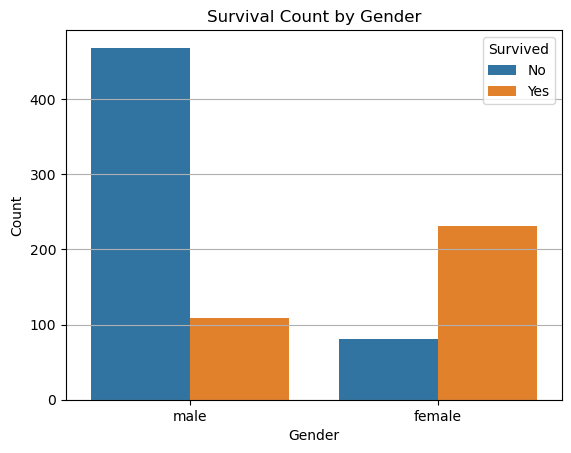

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

# Barplot: Gender vs Survival
sns.countplot(x='sex', hue='survived', data=df)
plt.title("Survival Count by Gender")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.grid(axis='y')
plt.show()


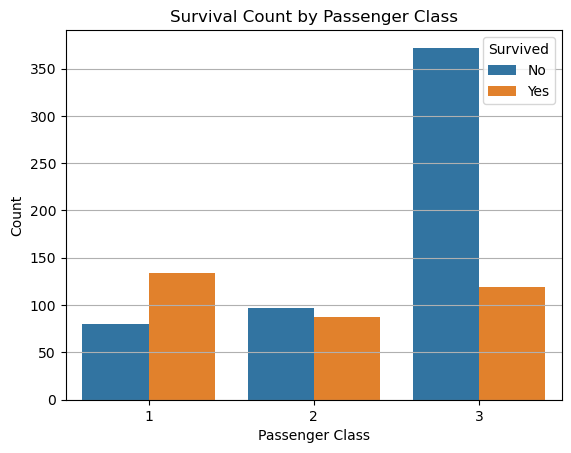

In [7]:
# Barplot: Class vs Survival
sns.countplot(x='pclass', hue='survived', data=df)
plt.title("Survival Count by Passenger Class")
plt.xlabel("Passenger Class")
plt.ylabel("Count")
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.grid(axis='y')
plt.show()


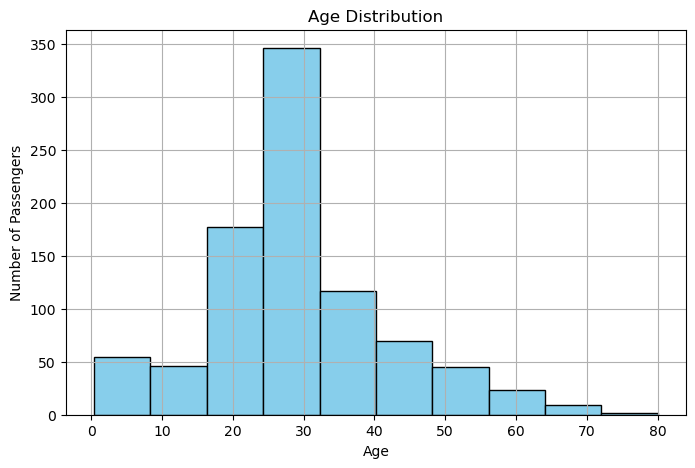

In [8]:
# Histogram of Age
plt.figure(figsize=(8, 5))
plt.hist(df['age'], bins=10, color='skyblue', edgecolor='black')
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Number of Passengers")
plt.grid(True)
plt.show()


In [10]:
# Convert 'sex' and 'class' to numeric using one-hot encoding
df_encoded = pd.get_dummies(df, columns=['sex', 'class'], drop_first=True)


In [11]:
# Example of manual label encoding
df['sex'] = df['sex'].map({'male': 1, 'female': 0})
df['class'] = df['class'].map({'First': 1, 'Second': 2, 'Third': 3})


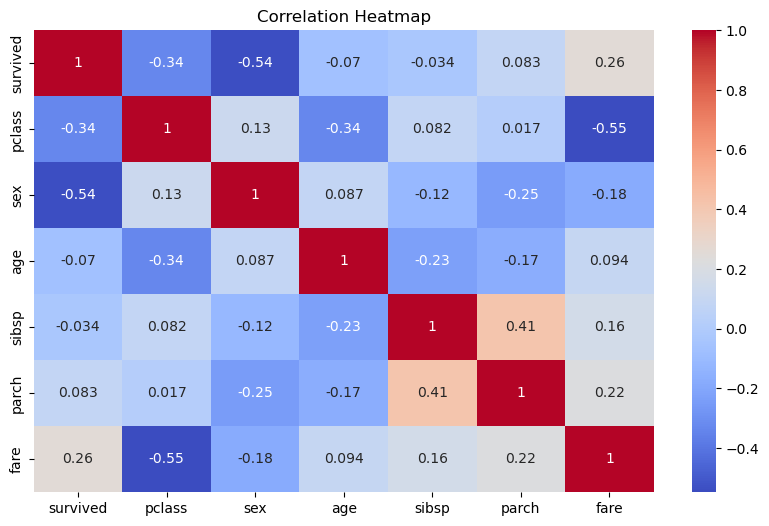

In [14]:
plt.figure(figsize=(10, 6))

# Select only numeric columns before calculating correlations
sns.heatmap(df.select_dtypes(include='number').corr(), annot=True, cmap='coolwarm')

plt.title("Correlation Heatmap")
plt.show()


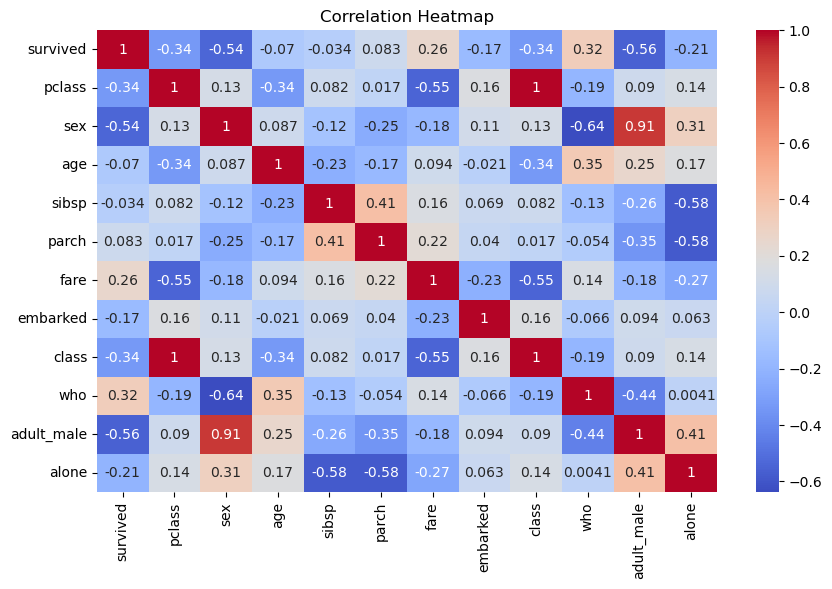

In [15]:
from sklearn.preprocessing import LabelEncoder

# Copy DataFrame to avoid overwriting original
df_encoded = df.copy()

# Encode categorical columns manually
label_cols = ['sex', 'embarked', 'who', 'class']
le = LabelEncoder()

for col in label_cols:
    df_encoded[col] = le.fit_transform(df_encoded[col])

# Now you can run correlation safely
plt.figure(figsize=(10, 6))
sns.heatmap(df_encoded.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


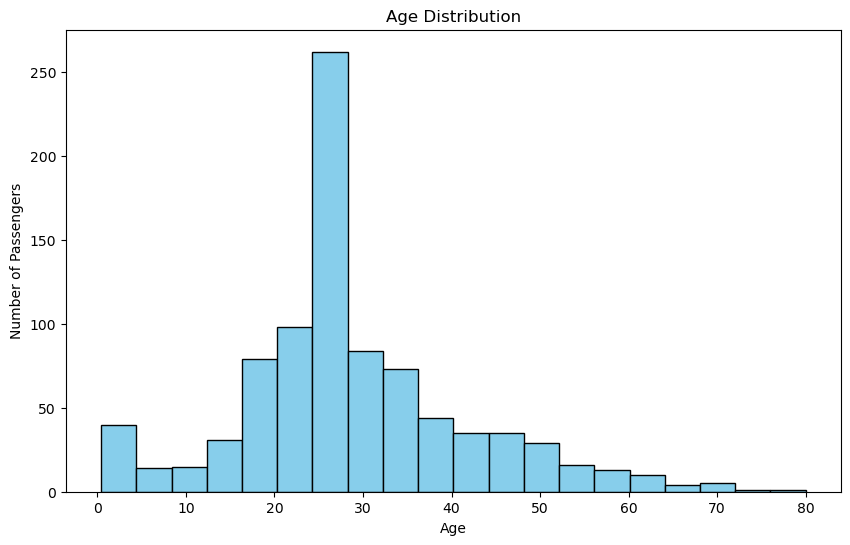

In [17]:
plt.figure(figsize=(10, 6))
plt.hist(df["age"], bins=20, color='skyblue', edgecolor='black')
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Number of Passengers")
plt.show()



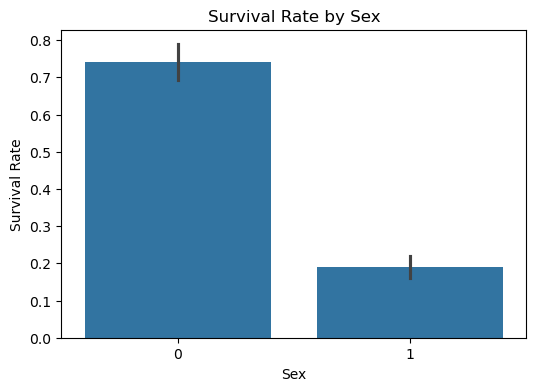

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
sns.barplot(data=df, x='sex', y='survived')
plt.title('Survival Rate by Sex')
plt.ylabel('Survival Rate')
plt.xlabel('Sex')
plt.show()


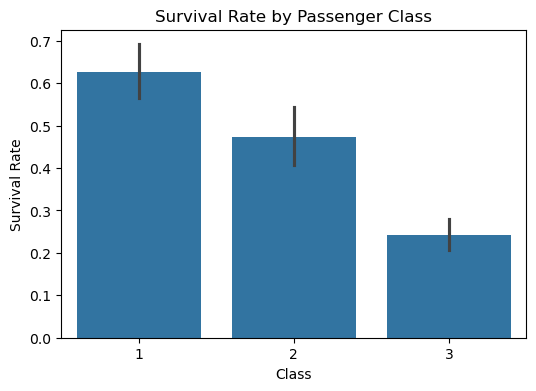

In [19]:
plt.figure(figsize=(6, 4))
sns.barplot(data=df, x='pclass', y='survived')
plt.title('Survival Rate by Passenger Class')
plt.ylabel('Survival Rate')
plt.xlabel('Class')
plt.show()


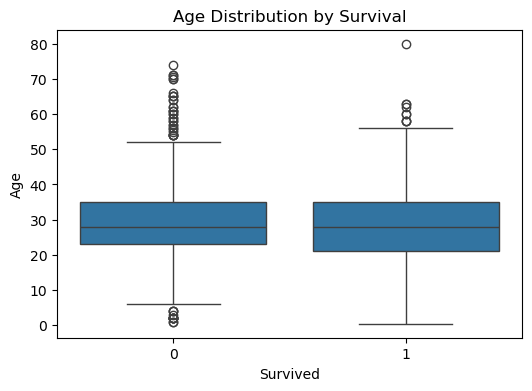

In [20]:
plt.figure(figsize=(6, 4))
sns.boxplot(data=df, x='survived', y='age')
plt.title('Age Distribution by Survival')
plt.xlabel('Survived')
plt.ylabel('Age')
plt.show()


In [21]:
# Select features — you can customize this
features = ['pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'embarked']
X = df[features]
y = df['survived']


In [22]:
from sklearn.preprocessing import LabelEncoder

# Make copies to avoid warnings
X = X.copy()

# Encode 'sex'
le_sex = LabelEncoder()
X['sex'] = le_sex.fit_transform(X['sex'])

# Encode 'embarked'
le_embarked = LabelEncoder()
X['embarked'] = le_embarked.fit_transform(X['embarked'])


In [23]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [24]:
from sklearn.linear_model import LogisticRegression

# Create the model
model = LogisticRegression(max_iter=200)

# Train it
model.fit(X_train, y_train)


LogisticRegression(max_iter=200)

In [25]:
y_pred = model.predict(X_test)


In [26]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

# Confusion matrix
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Classification report (includes precision, recall, f1-score)
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.7752808988764045
Confusion Matrix:
 [[84 25]
 [15 54]]
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.77      0.81       109
           1       0.68      0.78      0.73        69

    accuracy                           0.78       178
   macro avg       0.77      0.78      0.77       178
weighted avg       0.78      0.78      0.78       178



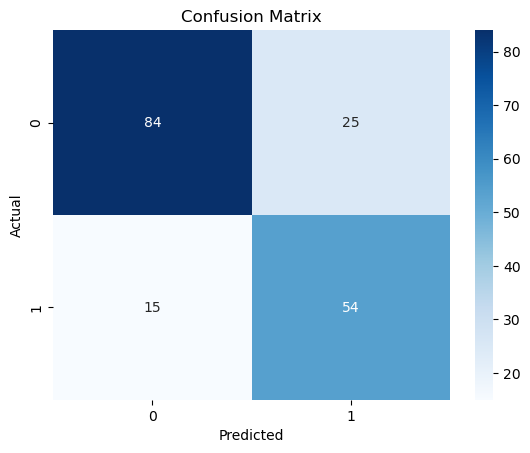

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


In [28]:
from sklearn.ensemble import RandomForestClassifier

# Create the model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [29]:
rf_pred = rf_model.predict(X_test)


Random Forest Accuracy: 0.7640449438202247
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.77      0.80       109
           1       0.68      0.75      0.71        69

    accuracy                           0.76       178
   macro avg       0.75      0.76      0.76       178
weighted avg       0.77      0.76      0.77       178



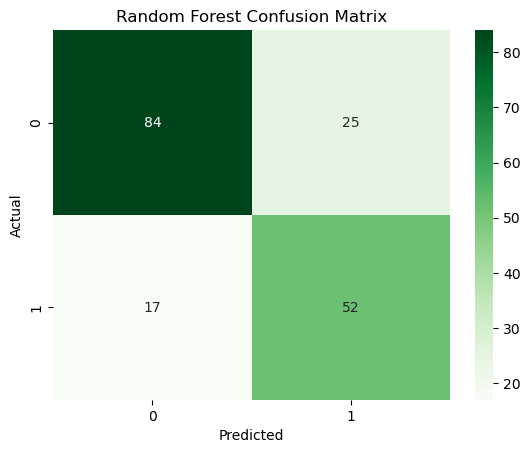

In [30]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print("Random Forest Accuracy:", accuracy_score(y_test, rf_pred))
print("Classification Report:\n", classification_report(y_test, rf_pred))

# Optional: Visualize confusion matrix
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(confusion_matrix(y_test, rf_pred), annot=True, fmt='d', cmap='Greens')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Random Forest Confusion Matrix")
plt.show()


In [31]:
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred))
print("Random Forest Accuracy:", accuracy_score(y_test, rf_pred))


Logistic Regression Accuracy: 0.7752808988764045
Random Forest Accuracy: 0.7640449438202247


In [32]:
# Get feature names and importance scores
import pandas as pd

feature_importance = pd.Series(rf_model.feature_importances_, index=X.columns)
feature_importance = feature_importance.sort_values(ascending=False)
print(feature_importance)


fare        0.272419
sex         0.258569
age         0.244928
pclass      0.093048
sibsp       0.054476
parch       0.038576
embarked    0.037984
dtype: float64


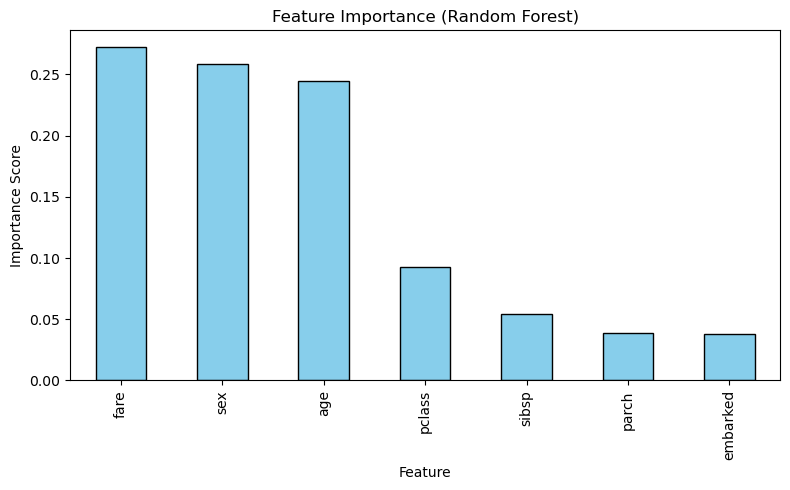

In [33]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
feature_importance.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title("Feature Importance (Random Forest)")
plt.ylabel("Importance Score")
plt.xlabel("Feature")
plt.tight_layout()
plt.show()


In [34]:
import joblib

# Save the Random Forest model
joblib.dump(rf_model, "random_forest_model.pkl")

# Load it again later
# rf_model = joblib.load("random_forest_model.pkl")


['random_forest_model.pkl']

In [35]:
plt.savefig('plot.png')


<Figure size 640x480 with 0 Axes>